In [400]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from keras.layers import Conv2D
from PIL import Image

In [401]:
(x_train, y_train), (x_test, y_test) = \
        tf.keras.datasets.mnist.load_data()

In [402]:
x_train = x_train /255 
x_test = x_test /255

In [403]:
x_train.shape

(60000, 28, 28)

## preparing the training pictures by rotating them randomly

In [404]:
rotated_x_train = []
angles_train = np.random.randint(0, 360, 60000)

In [405]:

for i in range(60000):
    x_train_img = Image.fromarray(x_train[i])
    rotated = Image.Image.rotate(x_train_img, angles_train[i])
    rotated_picture = np.array(rotated)
    rotated_x_train.append(rotated_picture)
    
    

In [406]:
#convert to tensor
rotated_x_train = tf.convert_to_tensor(rotated_x_train)

In [407]:
rotated_x_train.shape

TensorShape([60000, 28, 28])

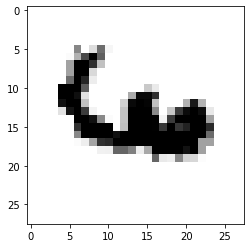

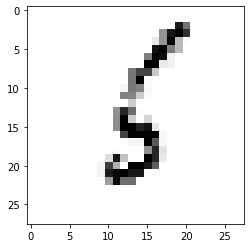

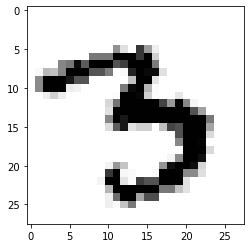

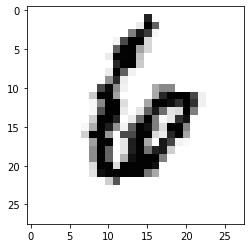

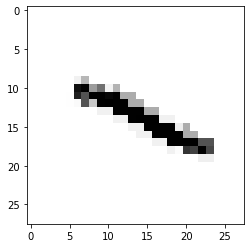

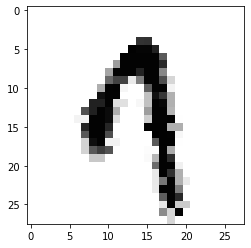

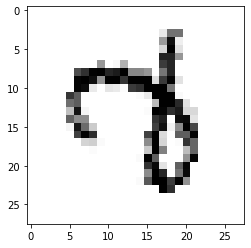

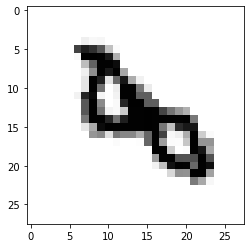

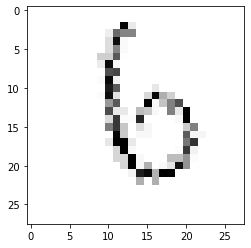

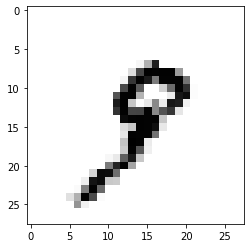

In [408]:
for i in range(10, 20): 
    plt.imshow( rotated_x_train[i], cmap='Greys')
    plt.show()

## preparing the test pictures by rotating them

In [409]:
rotated_x_test = []
angles_test = np.random.randint(0, 361, 10000)

In [410]:
for i in range(10000):
    x_test_img = Image.fromarray(x_test[i])
    rotated = Image.Image.rotate(x_test_img, angles_test[i])
    rotated_picture = np.array(rotated)
    rotated_x_test.append(rotated_picture)

In [411]:
#convert to tensor
rotated_x_test = tf.convert_to_tensor(rotated_x_test) 

In [412]:
rotated_x_test.shape

TensorShape([10000, 28, 28])

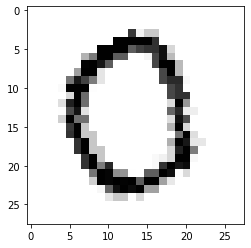

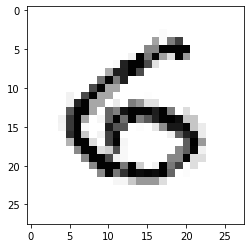

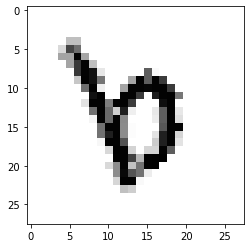

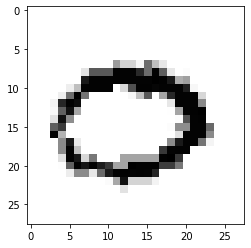

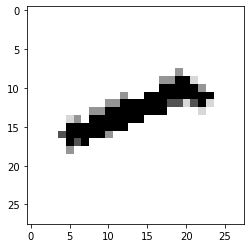

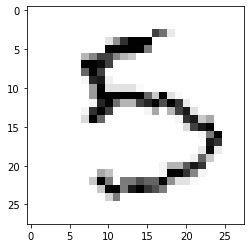

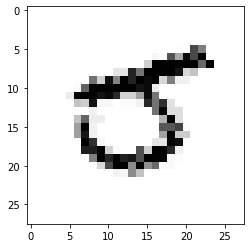

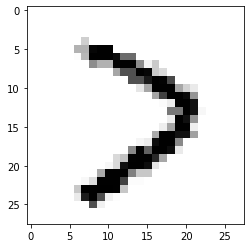

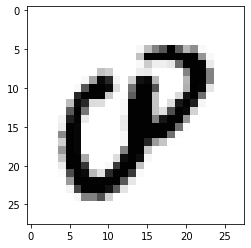

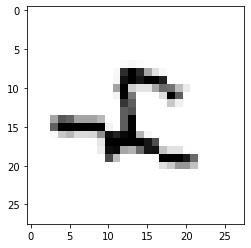

In [413]:
for i in range(10, 20): 
    plt.imshow( rotated_x_test[i], cmap='Greys')
    plt.show()

In [414]:
angles_train.shape

(60000,)

## converting numerical labels to binary labels

In [415]:
angles_train_softmax = np.zeros(shape=(60000,361),dtype=np.float32)    #could be done with to_categorical ??
angles_test_softmax = np.zeros(shape=(10000,361),dtype=np.float32)


for i in range (361):
    angles_train_softmax[np.where(angles_train == i),i] = 1
    angles_test_softmax[np.where(angles_test == i),i] = 1

In [416]:
#convert to tensor
angles_train_softmax = tf.convert_to_tensor(angles_train_softmax) 
angles_test_softmax = tf.convert_to_tensor(angles_test_softmax)

In [389]:
angles_train_softmax.shape

TensorShape([60000, 360])

## Model

In [421]:
#expand dimension

rotated_x_train = tf.expand_dims(rotated_x_train, -1)
rotated_x_test = tf.expand_dims(rotated_x_test, -1)

In [422]:
rotated_x_train.shape

TensorShape([60000, 28, 28, 1])

In [447]:
model = tf.keras.Sequential([

        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(361, activation='softmax')

])

In [448]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',  #mean squared error performs far worse
                metrics=['accuracy'])

In [449]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

In [451]:
model.fit(rotated_x_train, angles_train_softmax, batch_size = 128, epochs=20)  

predictions = model.predict(rotated_x_test)


print(tf.reduce_sum(
        tf.cast(
            tf.argmax(predictions,axis=1)==angles_test, ##warum nicht angles_test_softmax?? -> argmax
            tf.int16)).numpy())

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 546s 9ms/sample - loss: 5.0771 - accuracy: 0.0180
Epoch 2/20
60000/60000 [==============================] - 557s 9ms/sample - loss: 4.0012 - accuracy: 0.0541
Epoch 3/20
60000/60000 [==============================] - 553s 9ms/sample - loss: 3.2266 - accuracy: 0.1433
Epoch 4/20
60000/60000 [==============================] - 570s 9ms/sample - loss: 2.5401 - accuracy: 0.2715
Epoch 5/20
60000/60000 [==============================] - 550s 9ms/sample - loss: 2.0395 - accuracy: 0.3778
Epoch 6/20
60000/60000 [==============================] - 549s 9ms/sample - loss: 1.6748 - accuracy: 0.4677
Epoch 7/20
60000/60000 [==============================] - 545s 9ms/sample - loss: 1.4358 - accuracy: 0.5297
Epoch 8/20
60000/60000 [==============================] - 552s 9ms/sample - loss: 1.2605 - accuracy: 0.5828
Epoch 9/20
60000/60000 [==============================] - 561s 9ms/sample - loss: 1.1314 - accuracy: 0.6197
Epoch

## testing the model

In [452]:
diff_arr = []
for i in range(10000):
    diff = abs(angles_test[i] - tf.argmax(predictions[i]))
    diff_arr.append(diff)
    
mean_diff = np.mean(diff_arr)


In [453]:
mean_diff

8.6083

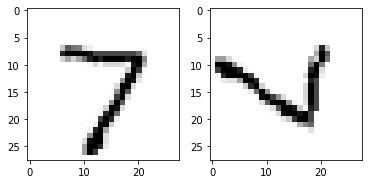

True angle:  264
Predicted angle:  264


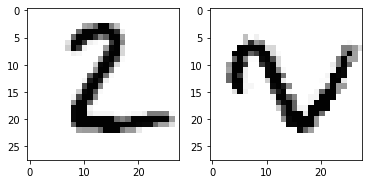

True angle:  56
Predicted angle:  236


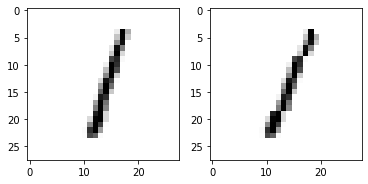

True angle:  354
Predicted angle:  354


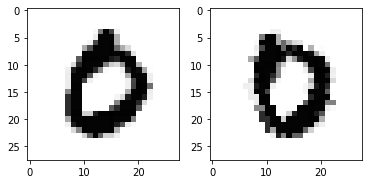

True angle:  27
Predicted angle:  27


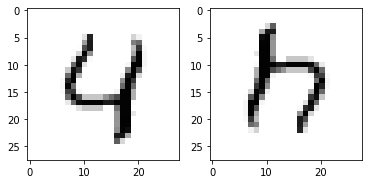

True angle:  180
Predicted angle:  180


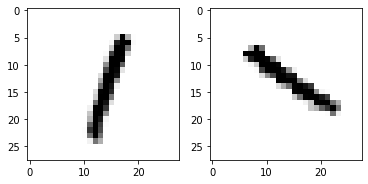

True angle:  73
Predicted angle:  73


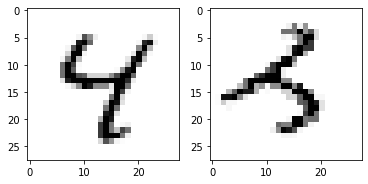

True angle:  152
Predicted angle:  152


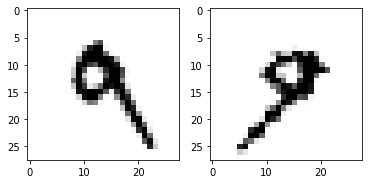

True angle:  287
Predicted angle:  287


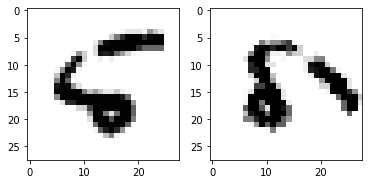

True angle:  304
Predicted angle:  304


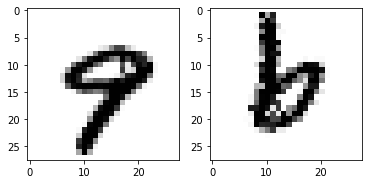

True angle:  214
Predicted angle:  214


In [454]:
for i in range(10):

    original_img = x_test[i]
    true_angle = np.random.randint(360)

    pil_x_train = Image.fromarray(original_img)
    rotated = Image.Image.rotate(pil_x_train, true_angle)
    rotated_picture = np.array(rotated)

    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(original_img, cmap='Greys')
    f.add_subplot(1,2, 2)
    plt.imshow(rotated_picture, cmap='Greys')
    plt.show()
       
    print('True angle: ', true_angle)

    rotated_picture = np.expand_dims(rotated_picture, (-1,0))

    result = model.predict(rotated_picture)
    predicted_angle = np.argmax(result)
    print('Predicted angle: ', predicted_angle)
